In [1]:
#Librerie e funzioni importate
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.ensemble import VotingRegressor

In [2]:
#Caricamento e analisi iniziale dei dati
data = pd.read_csv('movie_info.csv')
print(data.head())
print(data.info())
print(data.describe())

                          movie_title  release_date  season  phase  \
0                            Iron Man    May 2 2008       1      1   
1                 The Incredible Hulk  June 13 2008       1      1   
2                          Iron Man 2    May 7 2010       1      1   
3                                Thor    May 6 2011       1      1   
4  Captain America: The First Avenger  July 22 2011       2      1   

   production_budget_in_million_(USD)  worldwide_collection_in_million_(USD)  \
0                                 140                                 585.37   
1                                 150                                 264.77   
2                                 200                                 623.93   
3                                 150                                 449.33   
4                                 140                                 370.57   

   tomatometer  tomato_audience_score  imdb  metascore  meta_user_score  
0          9.4          

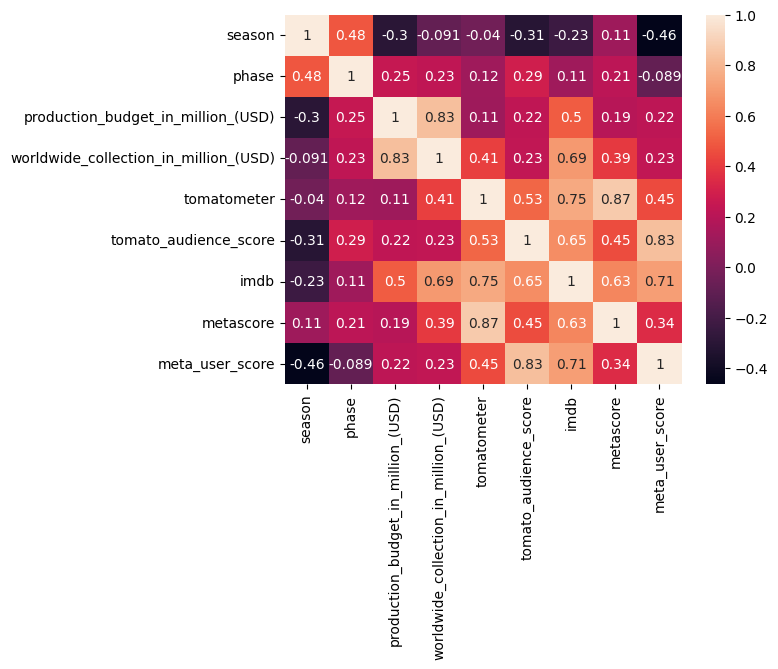

In [3]:
# Calcolo della matrice di correlazione
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

In [4]:
# Seleziona solo le correlazioni relative alla variabile target
target_corr = corr_matrix['worldwide_collection_in_million_(USD)']

In [5]:
# Stabilisce una soglia di correlazione
threshold = 0.70

In [6]:
# Seleziona le colonne con una correlazione superiore alla soglia
selected_columns = target_corr[abs(target_corr) > threshold].index

In [7]:
# Mantiene solo le colonne selezionate nel dataset
data = data[selected_columns]

In [8]:
# Preparazione del dataset
X = data.drop('worldwide_collection_in_million_(USD)', axis=1)
y = data['worldwide_collection_in_million_(USD)']

In [9]:
# Divisione in train e test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

In [10]:
# Modelli da confrontare
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=30),
    'Random Forest': RandomForestRegressor(random_state=30),
}

In [11]:
# Creazione di una lista di modelli di base
estimators = [
    ('Linear Regression', models['Linear Regression']),
    ('Decision Tree', models['Decision Tree']),
    ('Random Forest', models['Random Forest'])
]

In [12]:
# Creazione del VotingRegressor
voting_regressor = VotingRegressor(estimators=estimators)

In [13]:
# Addestramento del VotingRegressor
voting_regressor.fit(X_train, y_train)

VotingRegressor(estimators=[('Linear Regression', LinearRegression()),
                            ('Decision Tree',
                             DecisionTreeRegressor(random_state=30)),
                            ('Random Forest',
                             RandomForestRegressor(random_state=30))])

In [14]:
# Valutazione del VotingRegressor
y_pred = voting_regressor.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2_score = voting_regressor.score(X_test, y_test)

In [15]:
print(f'Voting Regressor RMSE: {rmse}')
print(f'Voting Regressor R²: {r2_score}')

Voting Regressor RMSE: 573.2859935912958
Voting Regressor R²: 0.5950225104249979


In [16]:
# Addestramento e valutazione dei modelli
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    print(f'{name} RMSE: {rmse}')

Linear Regression RMSE: 312.14738907244225
Decision Tree RMSE: 752.2890839270723
Random Forest RMSE: 729.0648050027856


In [17]:
# Cross-validation
for name, model in models.items():
    scores = cross_val_score(model, X, y, cv=15, scoring='neg_root_mean_squared_error')
    print(f'{name} CV RMSE: {-scores.mean()}')

Linear Regression CV RMSE: 309.064227997321
Decision Tree CV RMSE: 367.777567177032
Random Forest CV RMSE: 356.26085484600736


In [20]:
# Creazione di un grafico a barre per confrontare i vari algoritmi
rmse_scores = {}
for name, model in models.items():
    y_pred = model.predict(X_test)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    rmse_scores[name] = rmse

In [21]:
# Creazione di un grafico a barre per confrontare i vari algoritmi Ottimizzati
cv_rmse_scores = {}
for name, model in models.items():
    scores = cross_val_score(model, X, y, cv=5, scoring='neg_root_mean_squared_error')
    cv_rmse_scores[name] = -scores.mean()

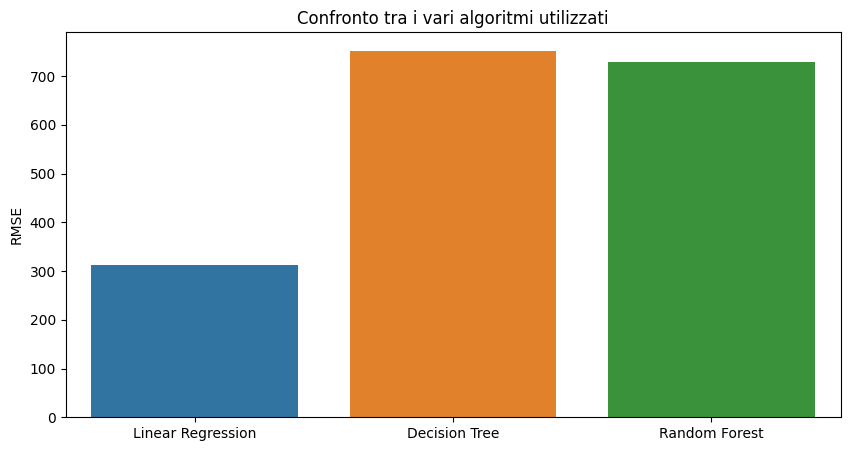

In [22]:
# Stampa del grafico a barre base
plt.figure(figsize=(10, 5))
sns.barplot(x=list(rmse_scores.keys()),
y=list(rmse_scores.values()))
plt.ylabel('RMSE')
plt.title('Confronto tra i vari algoritmi utilizzati')
plt.show()

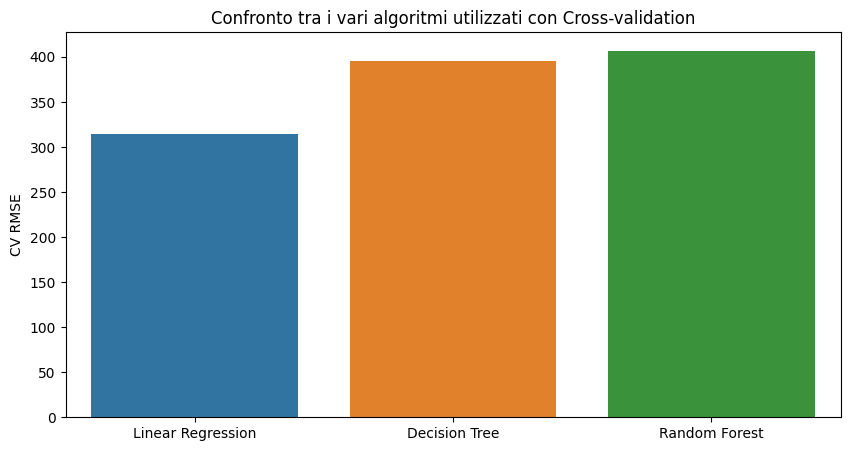

In [23]:
# Stampa del grafico a barre ottimaizzato
plt.figure(figsize=(10, 5))
sns.barplot(x=list(cv_rmse_scores.keys()), y=list(cv_rmse_scores.values()))
plt.ylabel('CV RMSE')
plt.title('Confronto tra i vari algoritmi utilizzati con Cross-validation')
plt.show()